In [3]:
# Will reload modeules after this when they change!
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np

In [5]:
# From: http://localhost:8889/notebooks/PycharmProjects/neutral_loss/nl_0_3_clean_join_nb.ipynb
# Load dataframe of previously identified high-quality annotations
hq_df = pd.read_pickle('/Users/dis/PycharmProjects/neutral_loss/high_quality_cm3_output_02.pickle')

In [22]:
# Filter for pertinent columns and fdr better than 0.2
good_col = ['ds_id',
            'hmdb_ids',
            'polarity',
            'adduct',
            'formula',
            'fdr',
            'group',
            'analyzer'
           ]
hq_df = hq_df[good_col].copy(deep=True)
hq_df = hq_df[hq_df.fdr <= 0.2]
hq_df['polarity'].replace(1, 'positive', inplace=True)
hq_df['polarity'].replace(-1, 'negative', inplace=True)
hq_df

,ds_id,hmdb_ids,polarity,adduct,formula,fdr,group,analyzer
0,2017-08-01_07h47m38s,HMDB0007919,positive,+H,C44H86NO8P,0.05,U Rennes 1,FTICR
1,2017-08-01_07h47m38s,HMDB0008266,positive,+H,C44H86NO8P,0.05,U Rennes 1,FTICR
2,2017-08-01_07h47m38s,HMDB0008526,positive,+H,C44H86NO8P,0.05,U Rennes 1,FTICR
3,2017-08-01_07h47m38s,HMDB0008558,positive,+H,C44H86NO8P,0.05,U Rennes 1,FTICR
4,2017-08-01_07h47m38s,HMDB0008038,positive,+H,C44H86NO8P,0.05,U Rennes 1,FTICR
...,...,...,...,...,...,...,...,...
1069919,2019-07-04_09h50m41s,HMDB0112470,positive,+Na,C42H68NO10P,0.20,MPI Bremen,Orbitrap
1069920,2019-07-04_09h50m41s,HMDB0112494,positive,+Na,C42H68NO10P,0.20,MPI Bremen,Orbitrap
1069921,2019-07-04_09h50m41s,HMDB0112495,positive,+Na,C42H68NO10P,0.20,MPI Bremen,Orbitrap
1069945,2019-07-04_09h50m41s,HMDB0112328,positive,+Na,C41H76NO10P,0.20,MPI Bremen,Orbitrap


In [17]:
hq_df.ds_id.unique().shape

(318,)

In [28]:
list(hq_df.fdr.unique())[0]

0.05000000074505806

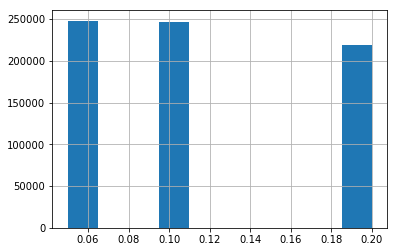

In [20]:
hq_df.fdr.hist()

In [23]:
# Paths to databases and output for next cell
limit_list = None
outname = ''
out_path = 'to_metaspace_hq/'
polarity = None
expt_neg = 'test_output/exp_negative.pickle'
expt_pos = 'test_output/exp_positive.pickle'
theo_neg = 'test_output/theo_negative.pickle'
theo_pos = 'test_output/theo_positive.pickle'
ref_expt = 'databases/ref_expt_df.pickle'
ref_theo = 'databases/ref_theo_df.pickle'

In [30]:
# Generats METASPACE database from Sirius output files
from sirius_to_metaspace_db import primary_loop

ds_id_list = list(hq_df.ds_id.unique())
for ds in ds_id_list:
    polarity = list(hq_df[hq_df.ds_id == ds].polarity.unique())[0]
    id_list = list(df[df.ds_id == ds].hmdb_ids.unique())
    print('ds: ', ds, ' ds_id_list: ', len(ds_id_list), 
          ' polarity: ', polarity)
    primary_loop(id_list,
                 ds, 
                 out_path,
                 polarity,
                 expt_pos,
                 theo_pos,
                 expt_neg,
                 theo_neg,
                 ref_expt,
                 ref_theo
                )

ds:  2017-08-01_07h47m38s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-01_07h47m38s.csv
ds:  2017-08-07_14h26m32s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38       

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-16_11h15m04s.csv
ds:  2019-07-23_23h51m54s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-09-12_00h25m56s.csv
ds:  2017-03-11_19h45m05s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-03-14_05h58m20s.csv
ds:  2016-10-14_17h51m23s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2016-10-14_17h51m23s.csv
ds:  2018-06-14_00

df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-01_07h51m51s.csv
ds:  2017-03-11_19h45m33s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15)
Observed ions: 
 -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
4 (231634, 15)
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to 

df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-01_07h50m35s.csv
ds:  2019-06-24_09h00m24s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas:

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-03-14_14h35m55s.csv
ds:  2019-10-29_21h29m01s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-10-29_16h53m33s.csv
ds:  2019-03-08_16h46m27s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-11-05_21h41m29s.csv
ds:  2017-01-20_17h52m13s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15)
Observed ions: 
 -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
4 (231634, 15)
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to in

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-07-21_09h23m08s.csv
ds:  2017-08-08_14h28m01s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-08_14h28m01s.csv
ds:  2017-08-09_10h06m25s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10    

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-05-29_11h23m11s.csv
ds:  2017-07-18_10h04m10s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-07-18_10h04m10s.csv
ds:  2019-08-02_00h07m33s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-10-29_17h49m49s.csv
ds:  2018-10-30_11h52m30s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-01-24_23h23m35s.csv
ds:  2019-07-01_13h09m29s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-12-20_16h30m17s.csv
ds:  2018-07-14_04h49m34s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-07-14_04h49m34s.csv
ds:  2018-08-01_10h39m53s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10    

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-01-28_00h48m00s.csv
ds:  2017-12-11_15h06m45s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-12-11_15h06m45s.csv
ds:  2018-05-20_22h29m50s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4  

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-08_14h29m48s.csv
ds:  2019-04-05_13h17m06s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-04-05_13h17m06s.csv
ds:  2018-01-10_12h49m21s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10    

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-09-14_13h43m01s.csv
ds:  2017-03-06_14h15m09s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-16_08h30m18s.csv
ds:  2017-02-24_13h22m14s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-03-12_08h57m03s.csv
ds:  2019-10-29_21h37m26s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15)
Observed ions: 
 -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
4 (231634, 15)
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to in

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-15_19h13m44s.csv
ds:  2017-08-04_12h36m19s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-04_12h36m19s.csv
ds:  2016-12-01_18h11m49s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4  

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-12-21_07h22m01s.csv
ds:  2017-11-27_16h07m06s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-11-27_16h07m06s.csv
ds:  2018-05-29_11h27m19s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: in

Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-01_07h44m05s.csv
ds:  2018-10-08_01h26m58s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15)
Observed ions: 
 -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
4 (231634, 15)
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to in

Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-03-14_06h00m36s.csv
ds:  2018-05-24_11h23m11s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3  

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-10-29_16h28m34s.csv
ds:  2018-10-07_14h40m17s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15)
Observed ions: 
 -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
4 (231634, 15)
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Er

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-10-31_10h26m49s.csv
ds:  2017-08-15_19h58m16s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15)
Observed ions: 
 -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
4 (231634, 15)
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Er

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-03-14_14h32m59s.csv
ds:  2018-09-07_00h49m45s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-09-07_00h49m45s.csv
ds:  2018-08-01_14h15m01s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-02-24_03h51m09s.csv
ds:  2017-08-15_13h02m38s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-07-31_14h52m32s.csv
ds:  2018-05-21_18h57m46s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15)
Observed ions: 
 -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
4 (231634, 15)
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increme

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-06-22_08h41m52s.csv
ds:  2019-07-02_09h07m02s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-05-31_20h52m48s.csv
ds:  2019-05-07_21h22m27s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-06-08_08h57m39s.csv
ds:  2016-12-21_14h25m44s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-03-11_19h47m36s.csv
ds:  2017-08-08_14h27m05s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-09-11_23h54m26s.csv
ds:  2018-07-05_13h22m46s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-11-15_20h49m52s.csv
ds:  2018-07-05_15h25m32s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-08_14h18m50s.csv
ds:  2019-08-03_01h09m08s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-08-03_01h09m08s.csv
ds:  2018-07-12_05

df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-07-21_14h46m39s.csv
ds:  2018-08-01_14h23m16s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspac

df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-12-11_15h07m56s.csv
ds:  2017-07-20_14h23m17s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas:

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-09-10_14h25m54s.csv
ds:  2018-10-07_12h42m25s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-11-15_20h55m40s.csv
ds:  2016-12-16_22h07m51s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2016-12-16_22h07m51s.csv
ds:  2017-08-01_07h40m37s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4  

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-09_03h02m01s.csv
ds:  2017-08-08_14h30m25s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-03_12h25m10s.csv
ds:  2019-08-02_22h43m20s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-02_00h09m50s.csv
ds:  2016-11-15_12h00m00s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2016-11-15_12h00m00s.csv
ds:  2017-08-04_12h34m05s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4  

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-12-20_16h32m25s.csv
ds:  2017-12-20_16h24m55s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-12-20_16h24m55s.csv
ds:  2016-12-19_19h31m16s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-01-25_17h34m34s.csv
ds:  2018-08-01_14h20m09s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-10-04_17h59m03s.csv
ds:  2017-08-08_09h06m39s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-03-11_19h48m10s.csv
ds:  2016-12-16_22h08m07s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2016-12-16_22h08m07s.csv
ds:  2018-08-01_14h28m11s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4  

Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-03-22_10h16m54s.csv
ds:  2016-09-22_11h16m23s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2016-09-22_11h16m23s.csv
ds:  2017-08-09_01h24m04s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!

Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-08-04_12h39m49s.csv
ds:  2017-07-21_09h23m33s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-07-21_09h23m33s.csv
ds:  2018-09-01_00h55m05s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10    

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2017-09-08_17h00m55s.csv
ds:  2017-08-15_15h02m08s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
dmass not known!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-11-08_15h29m23s.csv
ds:  2017-03-14_05h54m15s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  

df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True    191991
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2018-09-14_18h15m42s.csv
ds:  2019-01-25_05h18m40s  ds_id_list:  318  polarity:  negative
1 (7747, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
2 (231634, 15) -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
3 (231634, 15)
Observed ions: 
 -1     231629
-7          3
-3          1
-12         1
Name: dmass, dtype: int64
4 (231634, 15)
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increme

Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
Error! No  H  to increment by  -1  in X!
dmass not known!
Correct ionformulas: 
 True    231557
Name: good_mass_calc, dtype: int64
to_metaspace_hq/2019-05-31_20h44m58s.csv
ds:  2018-08-01_11h05m36s  ds_id_list:  318  polarity:  positive
1 (9636, 10)
df_merge:  1000
df_merge:  2000
df_merge:  3000
df_merge:  4000
df_merge:  5000
df_merge:  6000
df_merge:  7000
df_merge:  8000
df_merge:  9000
2 (192003, 15)  1     190622
 22      1370
 38         6
-4          3
-10         1
 0          1
Name: dmass, dtype: int64
3 (191999, 15)
Observed ions: 
 1     190622
22      1370
38         6
0          1
Name: dmass, dtype: int64
4 (191991, 15)
Correct ionformulas: 
 True 

In [46]:
# Copy dataset (betat to beta) and search with custom METASPACE MSMS db
from clone_ds_to_beta import copy_beta

out_list = []
for ds_is in ds_id_list:
    x = copy_beta(ds_old, 'M', ds_new, prod_to_beta=False)
    out_list.append(x)

{'ds_id_in': '2020-03-12_17h55m21s', 'ds_id_out': '2020-05-14_16h32m01s'}
{'ds_id_in': '2020-03-15_19h57m37s', 'ds_id_out': '2020-05-14_16h32m04s'}
{'ds_id_in': '2020-01-29_17h04m12s', 'ds_id_out': '2020-05-14_16h32m07s'}
{'ds_id_in': '2020-02-06_09h48m17s', 'ds_id_out': '2020-05-14_16h32m10s'}
{'ds_id_in': '2020-03-03_10h05m06s', 'ds_id_out': '2020-05-14_16h32m14s'}
{'ds_id_in': '2019-05-28_13h26m26s', 'ds_id_out': '2020-05-14_16h32m16s'}
{'ds_id_in': '2019-05-28_17h27m37s', 'ds_id_out': '2020-05-14_16h32m19s'}
{'ds_id_in': '2019-05-29_16h19m01s', 'ds_id_out': '2020-05-14_16h32m22s'}
{'ds_id_in': '2019-05-31_12h00m59s', 'ds_id_out': '2020-05-14_16h32m26s'}


In [32]:
out_df = pd.DataFrame(out_list)

NameError: name 'out_list' is not defined

In [ ]:
Friday:
# Submit hq_df jobs to beta to run
# SpaceM to Andreas

Next:
# Code DL and score results: dataframe (patch Lachlan), images (works)
# Code new scoring functions

Future:
# To compare expt only versus expt/theo

1. Write script to downlaod and process results
2. Downlaod and process results